In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from nn_wrapper import NeuralNetworkWrapper
import numpy as np

### Importing and cleaning MNIST dataset

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
#one hot encoding
y_ohc = np.zeros((y.size, int(np.max(y))+1))
y_ohc[np.arange(y.size),y.astype(np.int)] = 1
y = y_ohc

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Training neural network

In [5]:
NN = NeuralNetworkWrapper(784, [50, 20, 20, 10], ['relu', 'relu', 'relu', 'softmax'], 'max_likelihood_loss', 0.005, 500)

In [6]:
NN.train(X, y_ohc, 50, 0)

Loss after 10 epochs: 0.3636324029734938
Loss after 20 epochs: 0.26682640244209
Loss after 30 epochs: 0.22087113157396446
Loss after 40 epochs: 0.19112843313123315
Loss after 50 epochs: 0.16960050829849518
Final loss: 0.16960050829849518


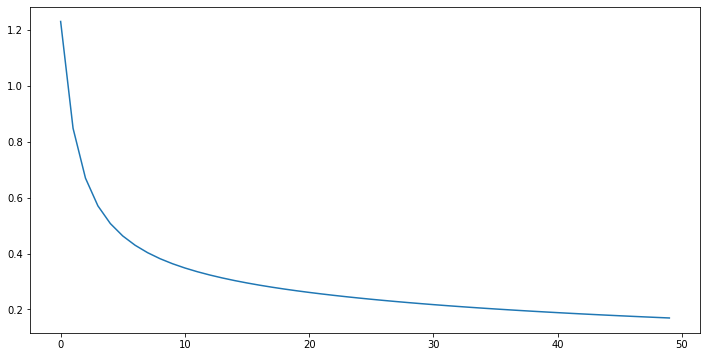

In [7]:
NN.plot_loss()

### Accuracy on test set

In [8]:
from sklearn.metrics import accuracy_score

y_hat = NN.predict(X_test).T

y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on training set: {accuracy}')

Accuracy on training set: 0.9493571428571429
